In [9]:
%matplotlib inline

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

import matplotlib.cm as cm
import matplotlib.colors as col

handle_list = []
cnt = 0

In [2]:
citydata=pd.read_csv(city_data_to_load)
ridedata=pd.read_csv(ride_data_to_load)

mergeddata=pd.merge(citydata,ridedata, how="inner", on="city")
mergeddata.head()




,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
#urbantype=mergeddata["type"]=="urban"
urbantype=mergeddata[mergeddata["type"]=="Urban"]
suburbantype=mergeddata[mergeddata["type"]=="Suburban"]
ruraltype=mergeddata[mergeddata["type"]=="Rural"]

In [4]:
urbanRcount=urbantype.groupby(["city"]).count()["ride_id"]
urbanaveragefare=urbantype.groupby(["city"]).mean()["fare"]
#next variable is strange, look over again
urbanDcount=urbantype.groupby(["city"]).count()["ride_id"]


In [5]:
suburbanRcount=suburbantype.groupby(["city"]).count()["ride_id"]
suburbanaveragefare=suburbantype.groupby(["city"]).mean()["fare"]
#next variable is strange, look over again
suburbanDcount=suburbantype.groupby(["city"]).count()["ride_id"]

In [6]:
ruralRcount=ruraltype.groupby(["city"]).count()["ride_id"]
ruralaveragefare=ruraltype.groupby(["city"]).mean()["fare"]
#next variable is strange, look over again
ruralDcount=ruraltype.groupby(["city"]).count()["ride_id"]

## Bubble Plot of Ride Sharing Data

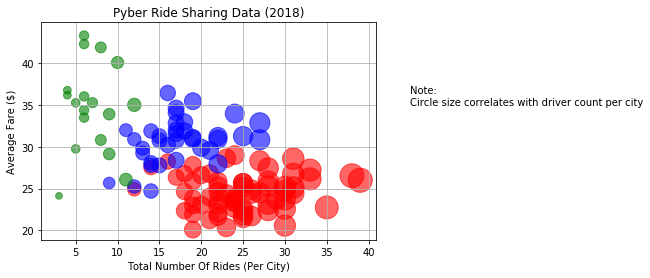

In [12]:
plt.scatter(urbanRcount,urbanaveragefare,c="red",marker="o",s=urbanDcount*15,alpha=.6)

plt.scatter(suburbanRcount,suburbanaveragefare,c="blue",marker="o",s=suburbanDcount*15,alpha=.6)

plt.scatter(ruralRcount,ruralaveragefare,c="green",marker="o",s=ruralDcount*15,alpha=.6)

plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.grid(True)
plt.text(45,35,"Note:\nCircle size correlates with driver count per city")

plt.savefig("Sca1.png")
plt.show()

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
percentpertype=mergeddata.groupby(["type"]).sum()["fare"]/mergeddata["fare"].sum()
plt.pie(percentpertype,labels=["Rural","Suburban","Urban"],
        colors=["green","blue","red"],shadow="True",
        startangle=150,autopct='%1.0f%%',explode=[0.2,0,0])
plt.title("Total Fares by City Type")
plt.savefig("Pie1.png")
plt.show()

## Total Rides by City Type

In [ ]:
ridepercentpertype=mergeddata.groupby(["type"]).count()["ride_id"]/mergeddata["ride_id"].count()
plt.pie(ridepercentpertype,labels=["Rural","Suburban","Urban"],
        colors=["green","blue","red"],shadow="True",
        startangle=150,autopct='%1.0f%%',explode=[0.2,0,0])
plt.title("Total Rides by City Type")
plt.savefig("Pie2.png")
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
driverpercentpertype=mergeddata.groupby(["type"]).sum()["driver_count"]/mergeddata["driver_count"].sum()
plt.pie(driverpercentpertype,labels=["Rural","Suburban","Urban"],
        colors=["green","blue","red"],shadow="True",
        startangle=160,autopct='%1.0f%%',explode=[0.2,0,0],)
plt.savefig("Pie3.png")
plt.show()